## Description
It takes a GWAS on a random phenotype and verifies that the Manhattan and QQ-plots look fine (without inflation).

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
from scipy.stats import uniform
from pathlib import Path

In [8]:
GWAS_DIR = Path(os.environ["PHENOPLIER_RESULTS_GLS_NULL_SIMS_UKB_40PCS"]) / "harmonized_gwas"
print(GWAS_DIR)

/tmp/phenoplier/results/gls/gwas/null_sims/ukb_50pcs/harmonized_gwas


In [9]:
def load_gwas_data(filename):
    """Load GWAS data, filter P values, and return a DataFrame."""
    filepath = os.path.join(GWAS_DIR, filename)
    gwas = pd.read_csv(filepath, sep="\t")
    gwas = gwas[(gwas["pvalue"] >= 0) & (gwas["pvalue"] <= 1)]
    return gwas

In [10]:
def plot_manhattan(gwas, chr_col, bp_col, p_col, snp_col, title):
    """Generate a Manhattan plot."""
    gwas["-log10P"] = -np.log10(gwas[p_col])
    plt.figure(figsize=(20, 10))
    gwas[chr_col] = gwas[chr_col].astype("category")
    gwas.sort_values(by=[chr_col, bp_col], inplace=True)
    gwas["ind"] = range(len(gwas))
    groups = gwas.groupby(chr_col)

    for i, (name, group) in enumerate(groups):
        plt.scatter(
            group["ind"],
            group["-log10P"],
            s=5,
            label=name,
            color=plt.cm.tab20.colors[i % 20]
        )

    plt.axhline(-np.log10(5e-8), color="red", linestyle="--", label="Genome-wide line")
    plt.xlabel("Chromosome")
    plt.ylabel("-log10(p-value)")
    plt.title(title)
    plt.legend(title="Chromosome", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 10)
    plt.tight_layout()
    plt.show()

In [11]:
def plot_qq(p_values, title):    
    """Generate a QQ plot for GWAS p-values."""
    # Use the uniform distribution as the null distribution!!!
    # Do -log10 transformation to p-values!
    # use func qq plot 2samples
    # x: expected array
    # y: observed array
    
    # Use np.random.unitform to generate expected values with the same size as the observed p_values
    # Or may use linspace instead of random.uniform, don't include 0 and 1. maybe 1 is okay but 0 is not.
    
    # Run TWAS when 
    
    # Calculate expected p-values (under uniform distribution)
    n = len(p_values)
    expected_p_values = np.arange(1, n + 1) / (n + 1)
    
    # Convert to -log10 scale
    observed_log_p = -np.log10(p_values)
    expected_log_p = -np.log10(expected_p_values)
    
    qqplot_2samples(expected_log_p, observed_log_p, xlabel="Expected -log10(p)", ylabel="Observed -log10(p)", line='45')
    plt.title(title)
    plt.show()

Phenotype 0: Dimensions = (6746644, 13)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs146477069   chr1_54421_A_G_b38       chr1     54421             G   
1   rs62637820   chr1_61920_G_A_b38       chr1     61920             A   
2   rs11810446   chr1_62738_T_C_b38       chr1     62738             C   
3   rs62639104   chr1_64931_G_A_b38       chr1     64931             A   
4  rs201637762  chr1_103058_C_T_b38       chr1    103058             T   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 A   0.023088  0.288978  1.060366     0.069911   
1                 G   0.029582  0.595439 -0.530971    -0.035090   
2                 T   0.033189  0.639164  0.468868     0.027072   
3                 G   0.067821  0.694922  0.392184     0.018223   
4                 C   0.018038  0.262429  1.120669     0.075275   

   standard_error  sample_size  n_cases  
0        0.065927        10000      NaN  
1        0.066085        100

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1837096/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


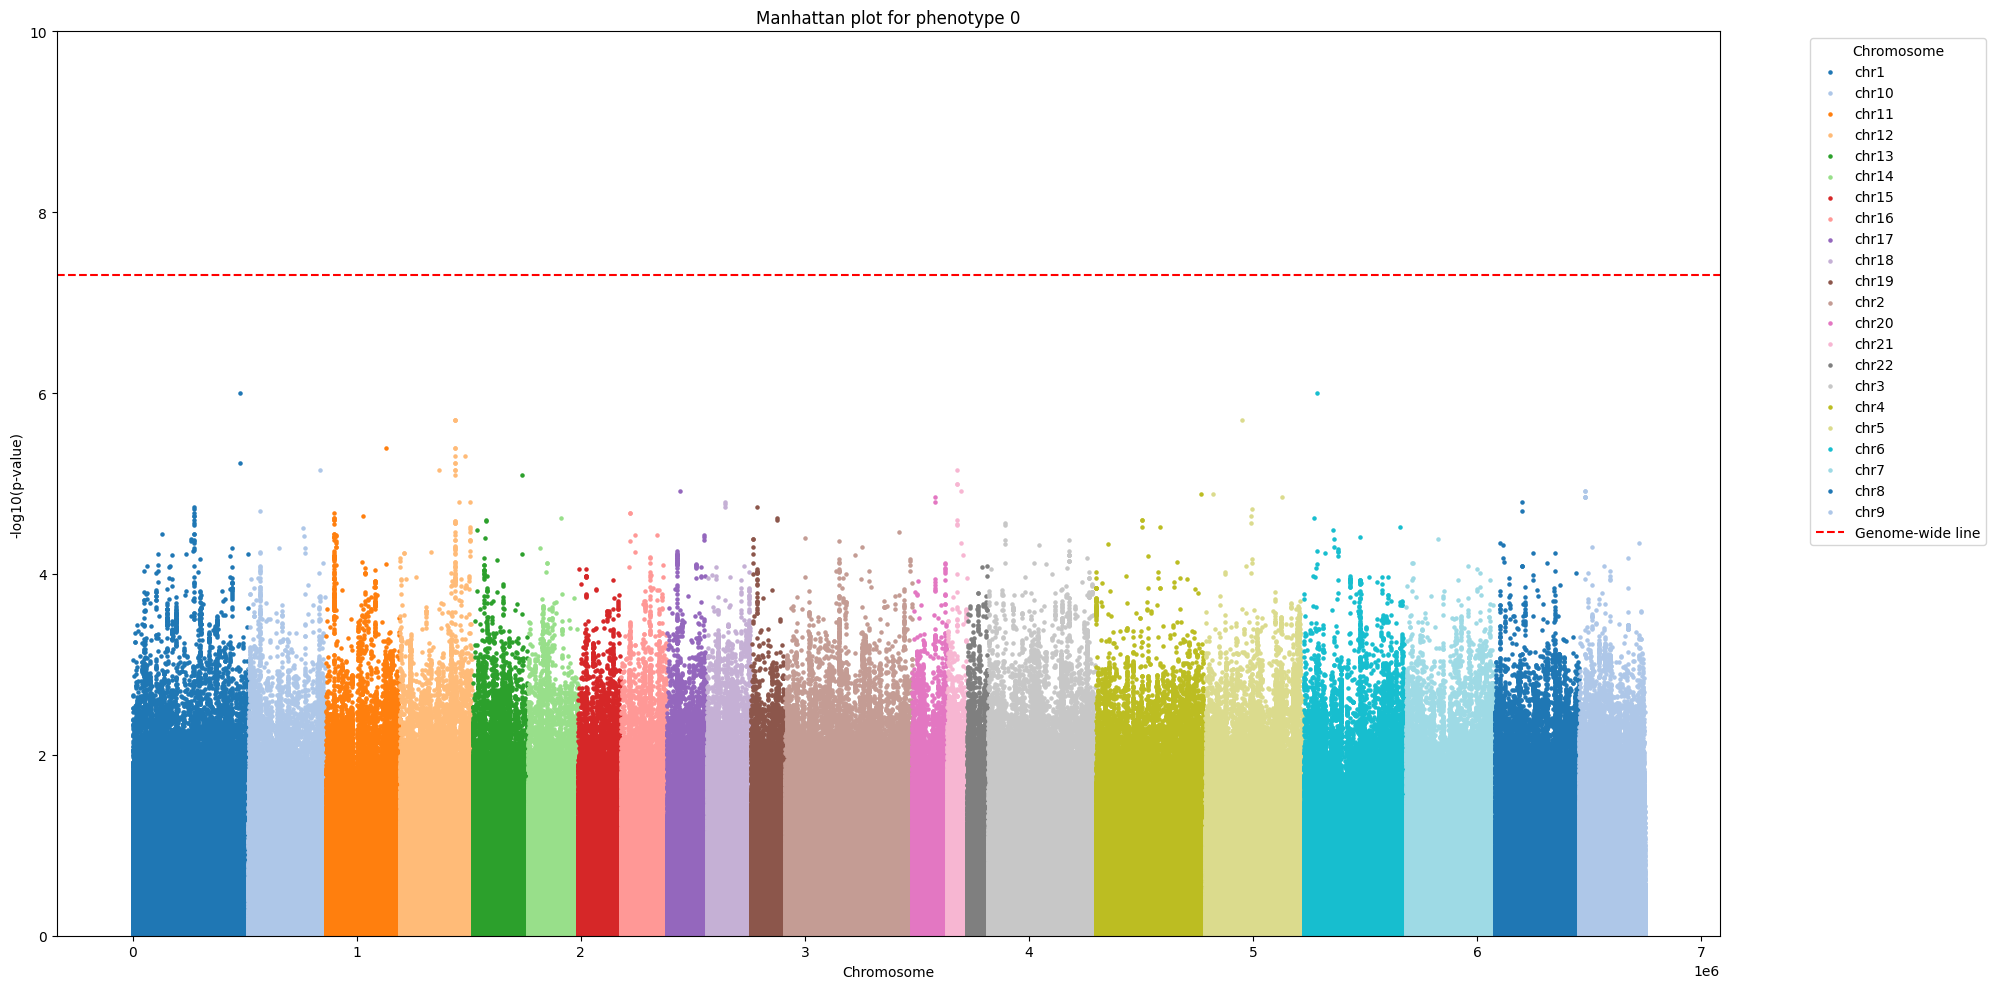

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


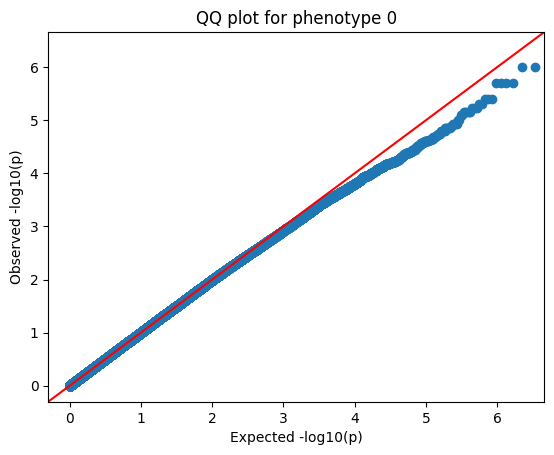

Phenotype 1: Dimensions = (6746644, 13)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs146477069   chr1_54421_A_G_b38       chr1     54421             G   
1   rs62637820   chr1_61920_G_A_b38       chr1     61920             A   
2   rs11810446   chr1_62738_T_C_b38       chr1     62738             C   
3   rs62639104   chr1_64931_G_A_b38       chr1     64931             A   
4  rs201637762  chr1_103058_C_T_b38       chr1    103058             T   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 A   0.023088  0.338787  0.956565     0.064208   
1                 G   0.029582  0.708174  0.374310     0.025184   
2                 T   0.033189  0.852851  0.185482     0.010903   
3                 G   0.067821  0.633007  0.477499     0.022588   
4                 C   0.018038  0.434833  0.780948     0.053405   

   standard_error  sample_size  n_cases  
0        0.067120        10000      NaN  
1        0.067280        100

/tmp/ipykernel_1837096/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


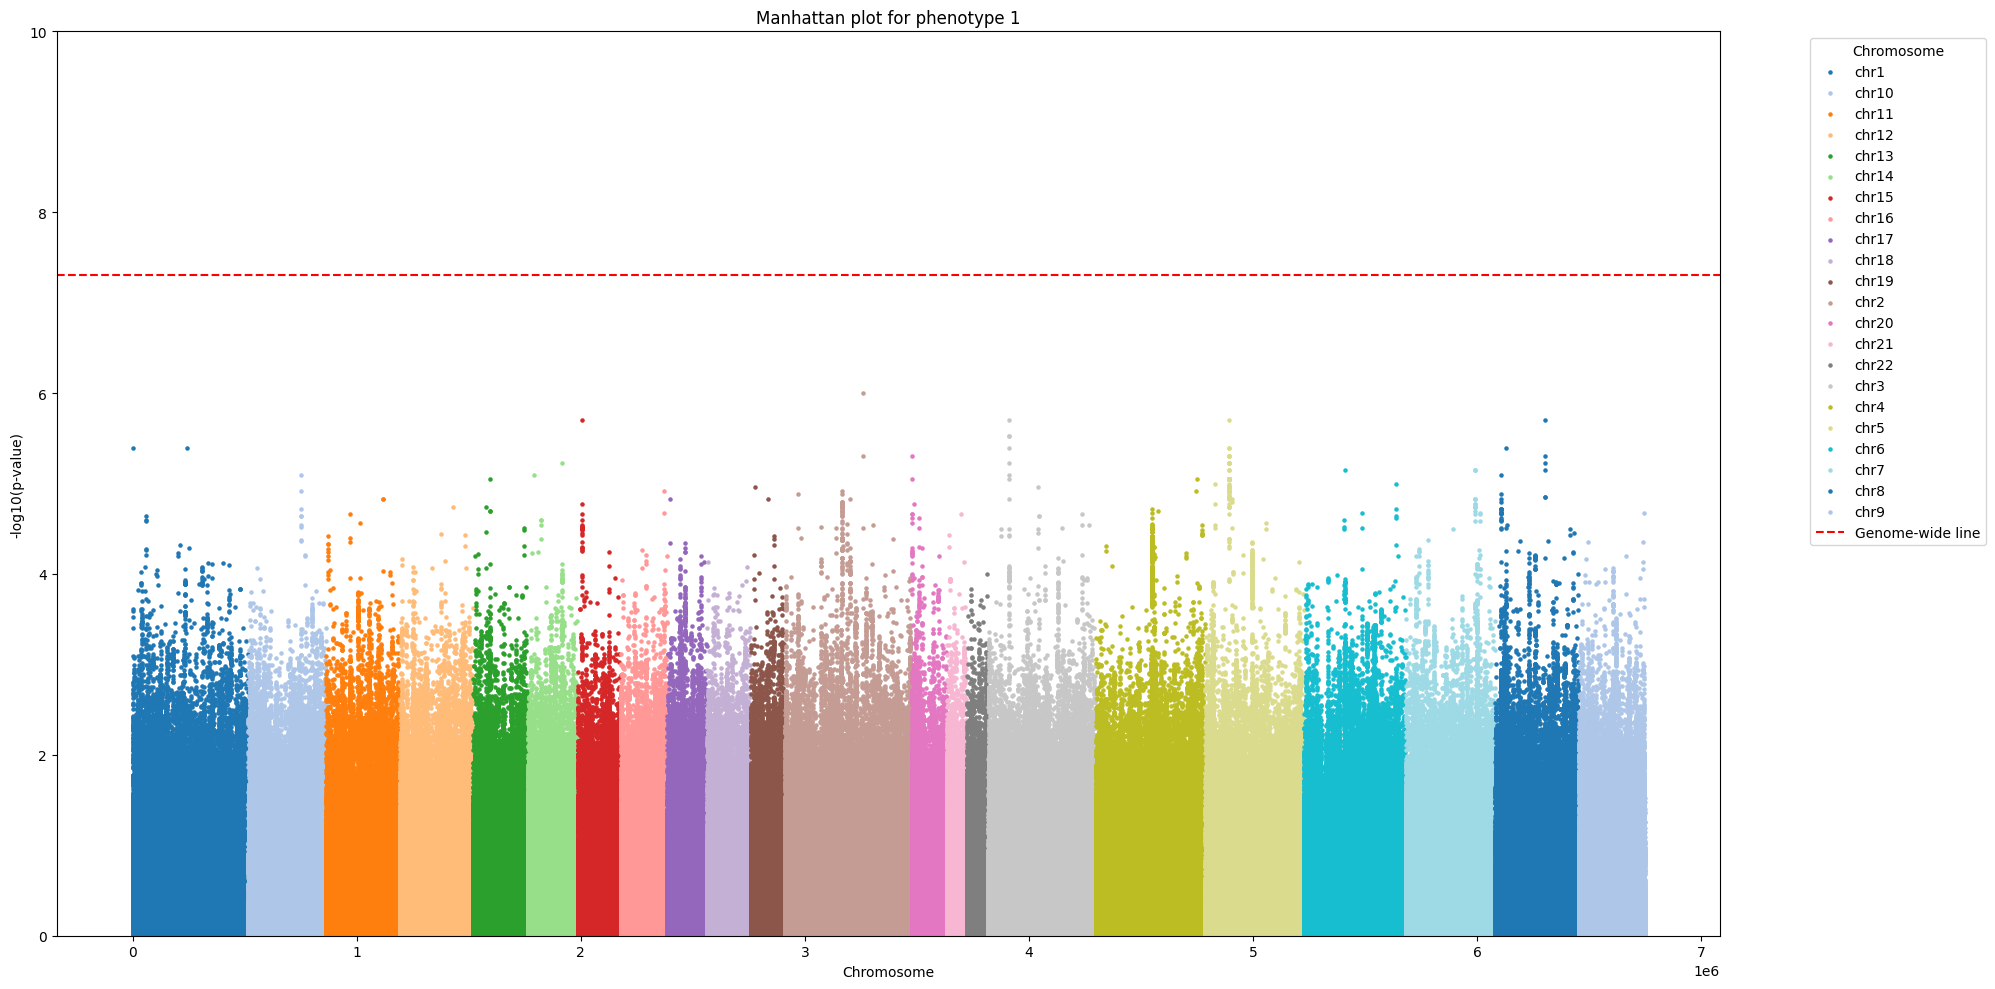

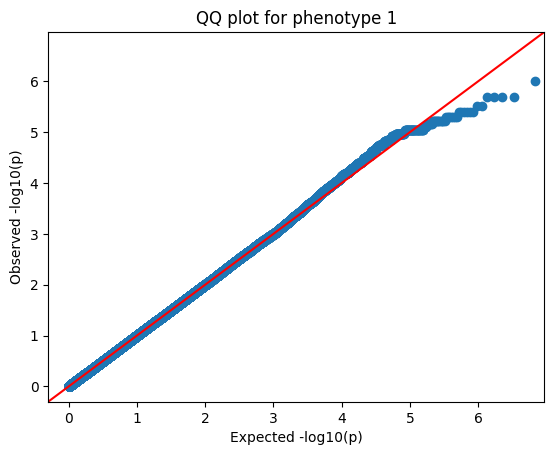

Phenotype 2: Dimensions = (6746644, 13)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs146477069   chr1_54421_A_G_b38       chr1     54421             G   
1   rs62637820   chr1_61920_G_A_b38       chr1     61920             A   
2   rs11810446   chr1_62738_T_C_b38       chr1     62738             C   
3   rs62639104   chr1_64931_G_A_b38       chr1     64931             A   
4  rs201637762  chr1_103058_C_T_b38       chr1    103058             T   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 A   0.023088  0.853841  0.184220     0.012313   
1                 G   0.029582  0.674381  0.420143     0.028146   
2                 T   0.033189  0.767301  0.295907     0.017320   
3                 G   0.067821  0.788404 -0.268384    -0.012641   
4                 C   0.018038  0.486437 -0.695987    -0.047391   

   standard_error  sample_size  n_cases  
0        0.066834        10000      NaN  
1        0.066990        100

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1837096/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


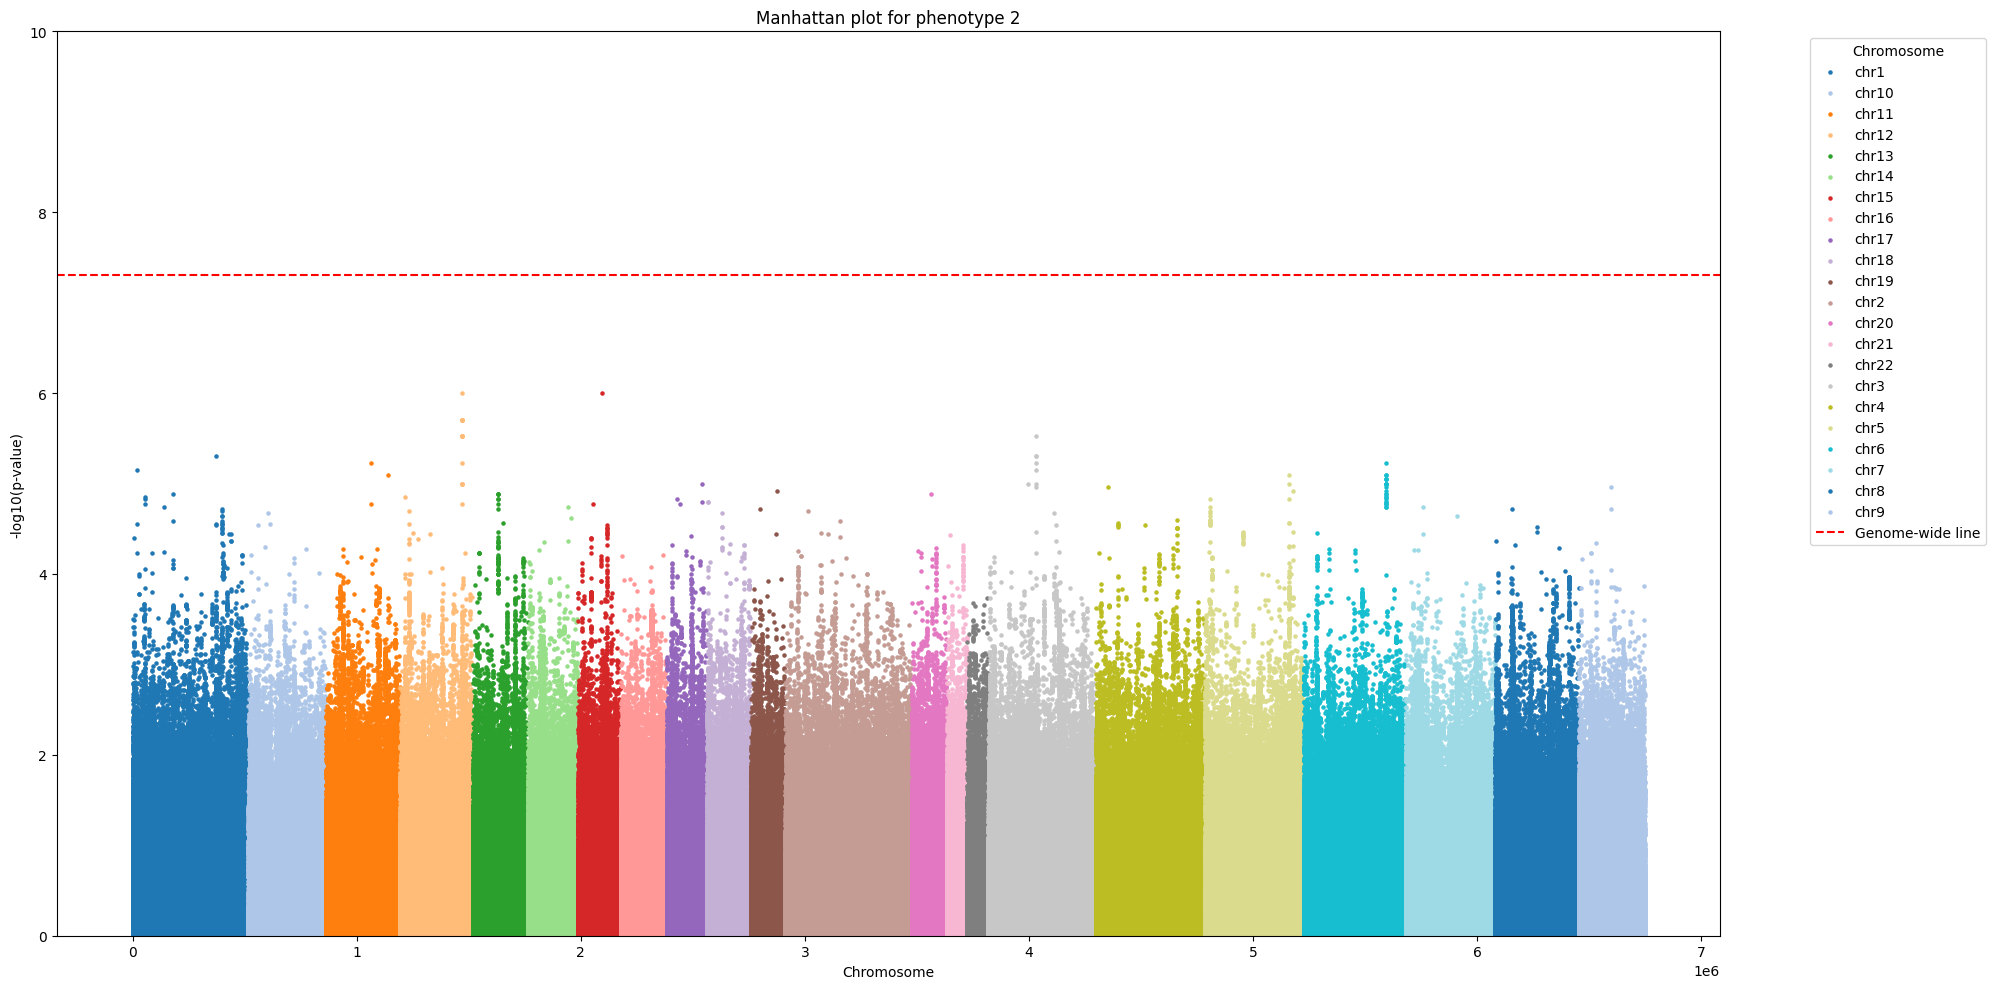

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


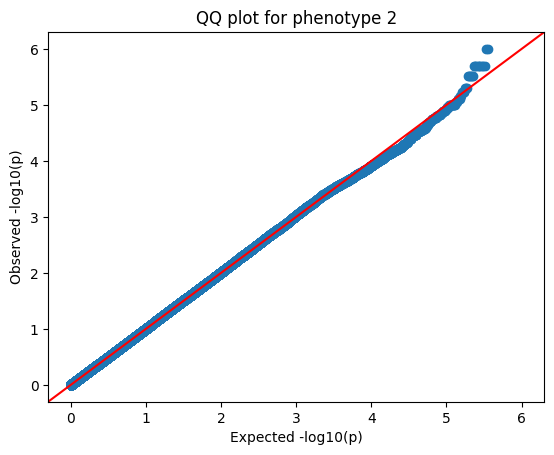

Phenotype 3: Dimensions = (6746644, 13)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs146477069   chr1_54421_A_G_b38       chr1     54421             G   
1   rs62637820   chr1_61920_G_A_b38       chr1     61920             A   
2   rs11810446   chr1_62738_T_C_b38       chr1     62738             C   
3   rs62639104   chr1_64931_G_A_b38       chr1     64931             A   
4  rs201637762  chr1_103058_C_T_b38       chr1    103058             T   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 A   0.023088  0.021917 -2.291803    -0.155154   
1                 G   0.029582  0.679933  0.412555     0.027999   
2                 T   0.033189  0.026058 -2.225346    -0.131937   
3                 G   0.067821  0.493174 -0.685269    -0.032699   
4                 C   0.018038  0.027534 -2.203863    -0.152006   

   standard_error  sample_size  n_cases  
0        0.067689        10000      NaN  
1        0.067865        100

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_1837096/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


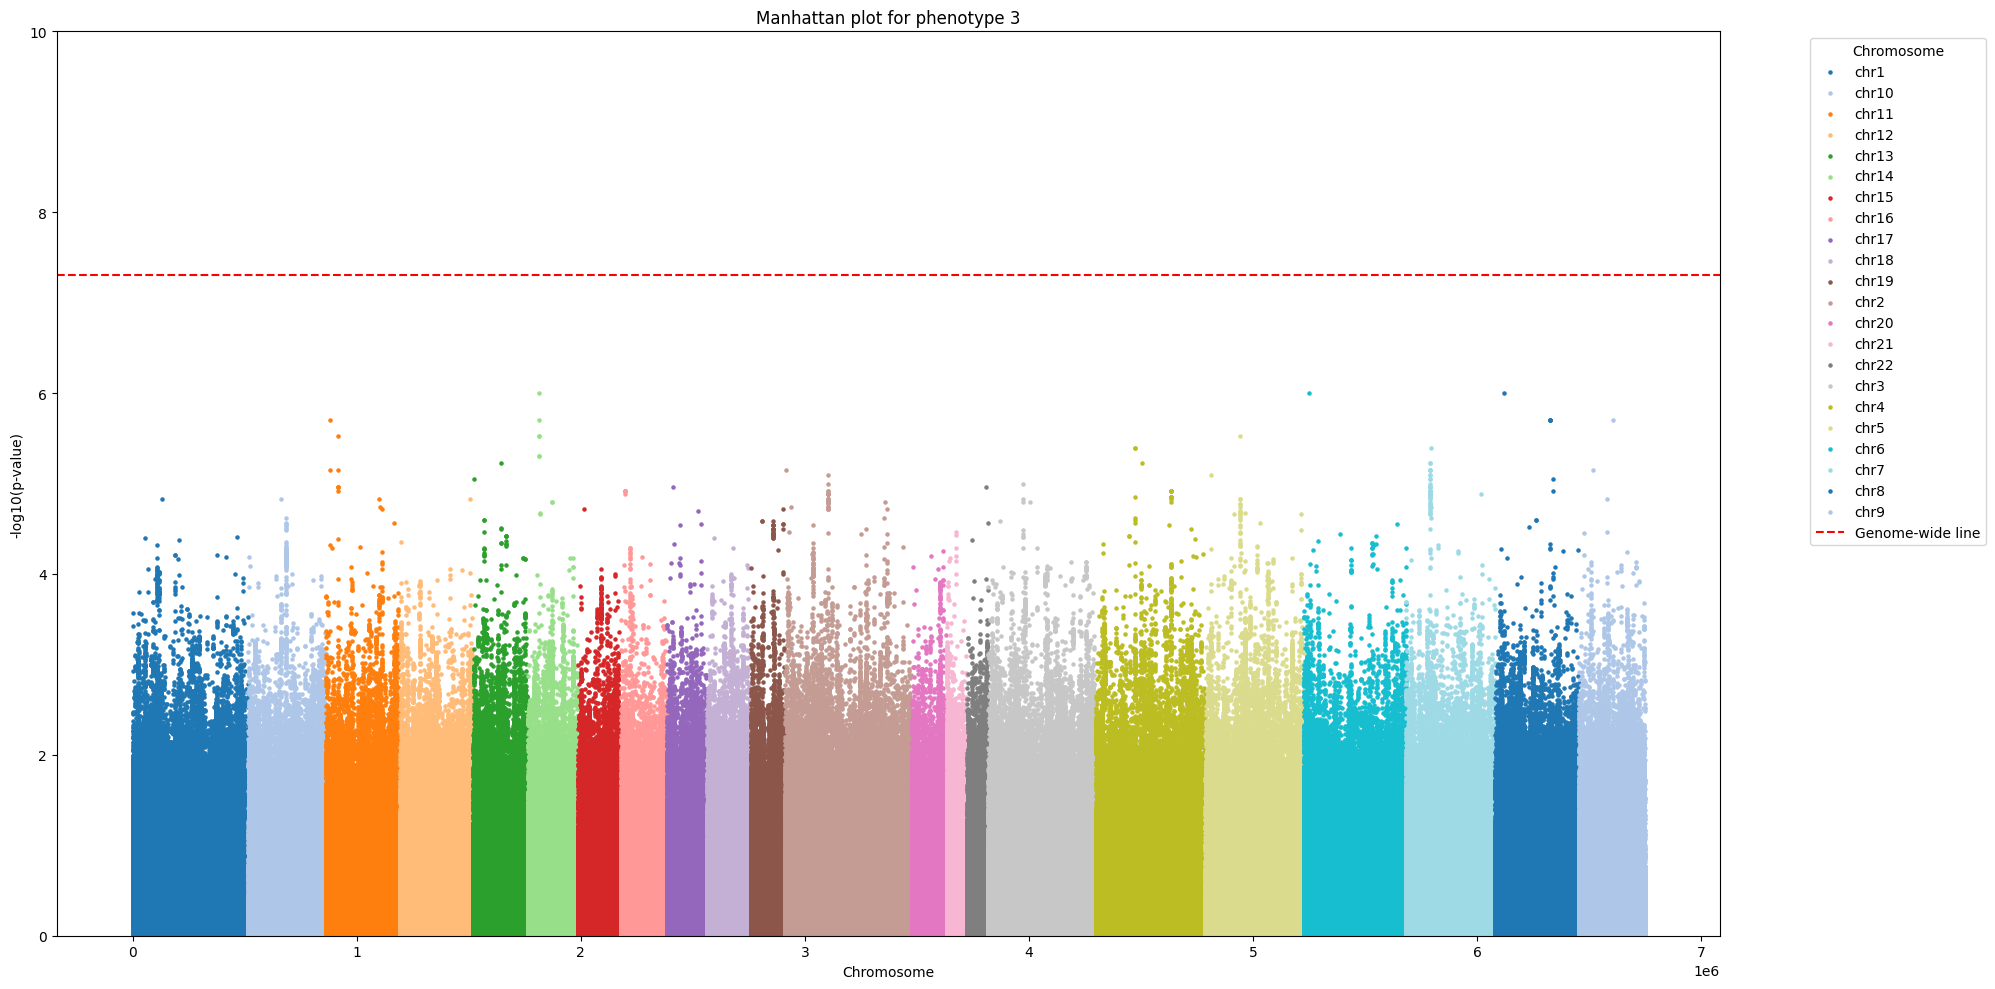

/home/haoyu/anaconda3/envs/phenoplier-cli/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


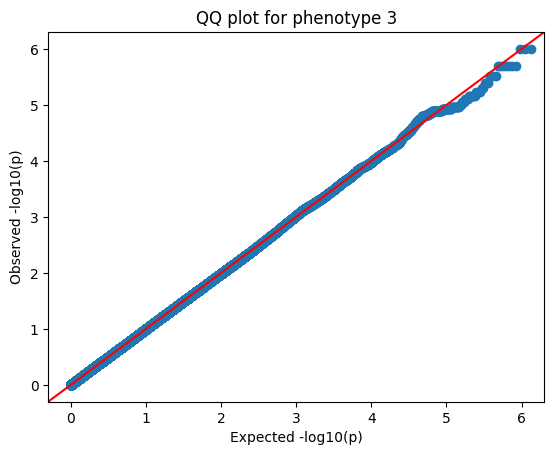

Phenotype 4: Dimensions = (6746644, 13)
    variant_id     panel_variant_id chromosome  position effect_allele  \
0  rs146477069   chr1_54421_A_G_b38       chr1     54421             G   
1   rs62637820   chr1_61920_G_A_b38       chr1     61920             A   
2   rs11810446   chr1_62738_T_C_b38       chr1     62738             C   
3   rs62639104   chr1_64931_G_A_b38       chr1     64931             A   
4  rs201637762  chr1_103058_C_T_b38       chr1    103058             T   

  non_effect_allele  frequency    pvalue    zscore  effect_size  \
0                 A   0.023088  0.530081  0.627882     0.041987   
1                 G   0.029582  0.147307 -1.449110    -0.097127   
2                 T   0.033189  0.845251 -0.195181    -0.011430   
3                 G   0.067821  0.010619 -2.554993    -0.120392   
4                 C   0.018038  0.641438  0.465689     0.031727   

   standard_error  sample_size  n_cases  
0        0.066869        10000      NaN  
1        0.067020        100

/tmp/ipykernel_1837096/3067375492.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = gwas.groupby(chr_col)


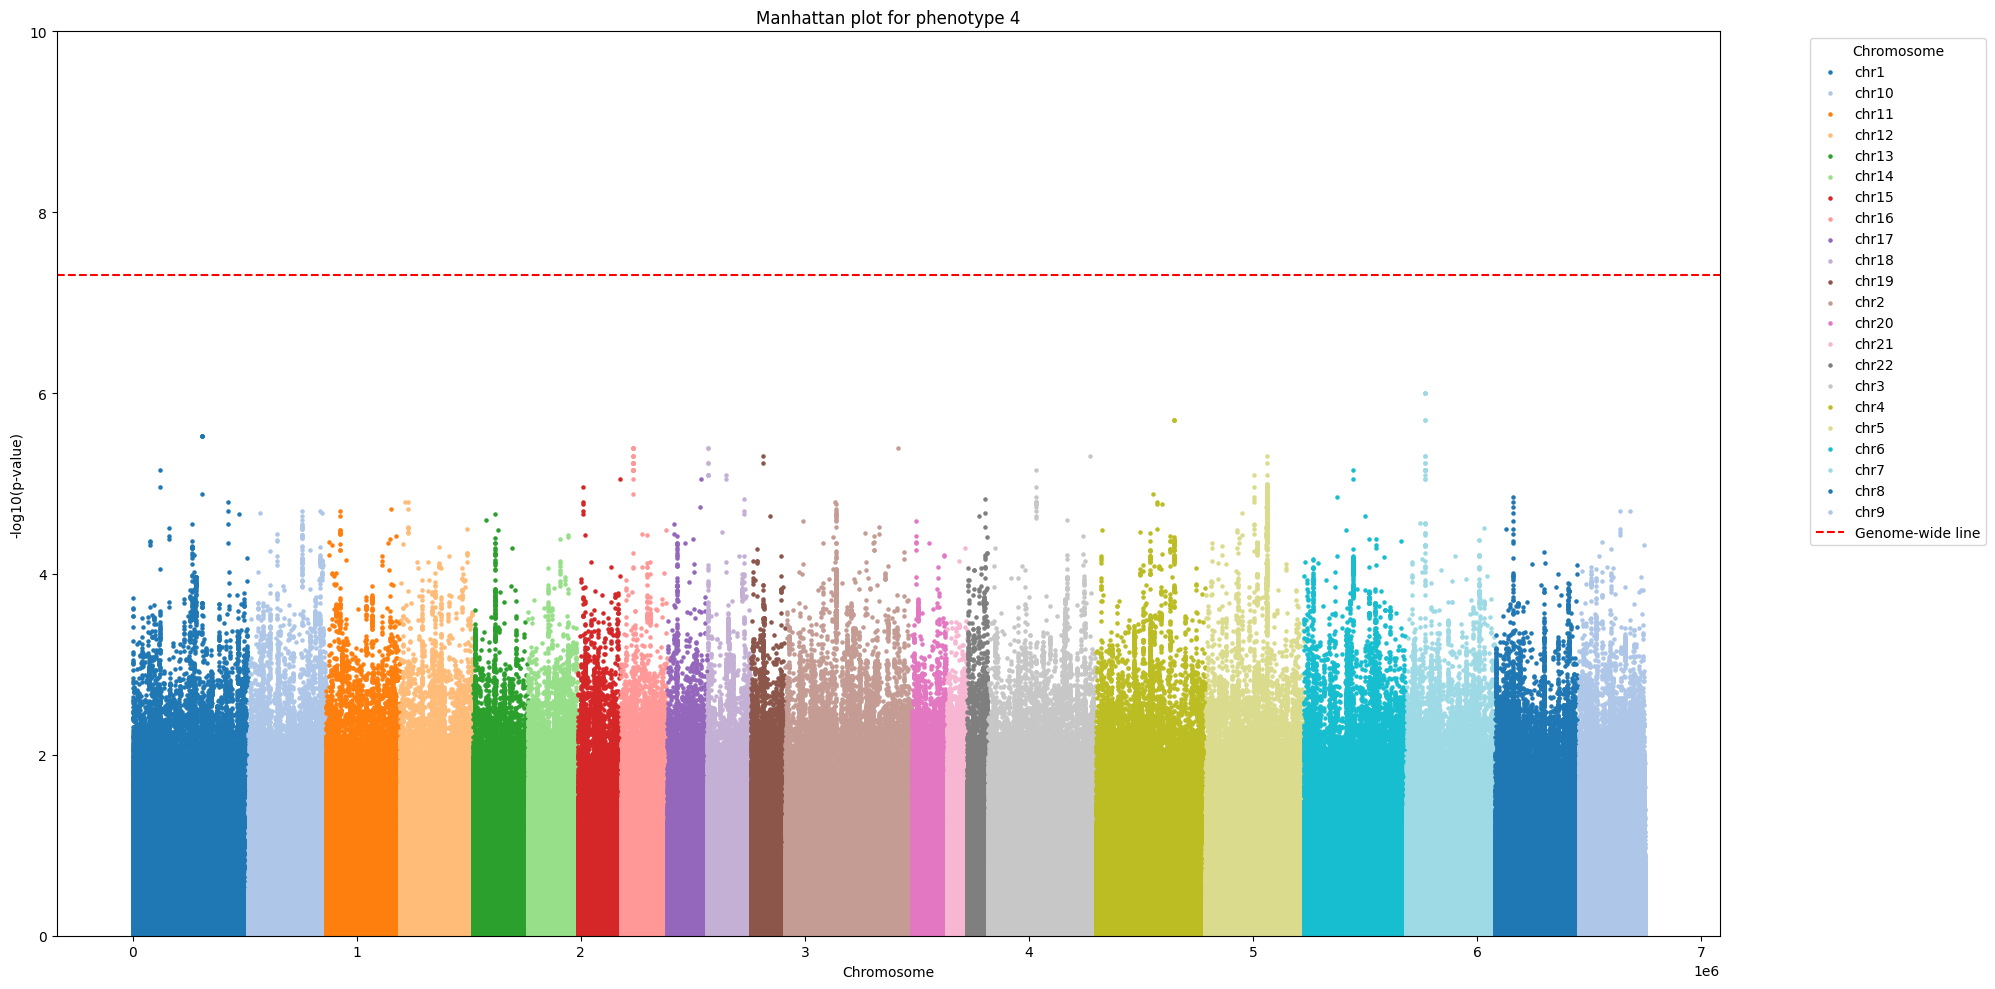

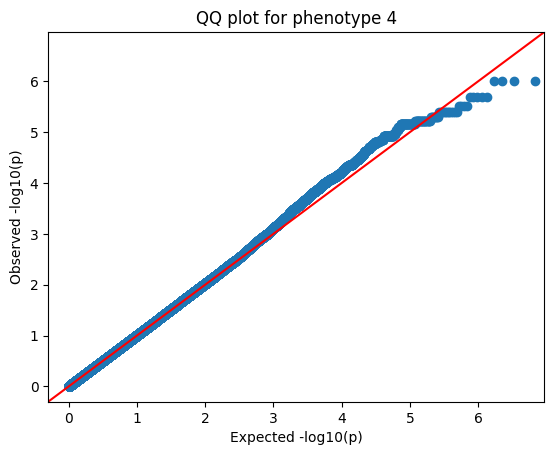

In [12]:
num_rand_phenotypes = 5

for phenotype in range(num_rand_phenotypes):
    filename = f"random.pheno{phenotype}.glm.linear.tsv-harmonized.txt"
    
    # Load data
    gwas = load_gwas_data(filename)
    print(f"Phenotype {phenotype}: Dimensions = {gwas.shape}")
    print(gwas.head())
    
    # Manhattan plot
    plot_manhattan(
        gwas,
        chr_col="chromosome",
        bp_col="position",
        p_col="pvalue",
        snp_col="variant_id",
        title=f"Manhattan plot for phenotype {phenotype}"
    )
    
    # QQ plot
    plot_qq(gwas["pvalue"], title=f"QQ plot for phenotype {phenotype}")
